In [21]:
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from yellowbrick.regressor import PredictionError
import pandas as pd
import matplotlib.pyplot as plt

r2Table = pd.DataFrame()
mseTable = pd.DataFrame()

r2Table["All Cost"] = [0.751, 0.850, 0.851, 0.857]
r2Table["High Cost"] = [0.524, 0.837, 0.848, 0.754]
r2Table["Low Cost"] = [0.871, 0.880, 0.894, 0.893]

mseTable["All Cost"] = [0.286, 0.172, 0.171, 0.164]
mseTable["High Cost"] = [0.403, 0.138, 0.129, 0.208]
mseTable["Low Cost"] = [0.137, 0.127, 0.113, 0.114]

r2Table.index = ["Linear Regression", "Random Forest", "XGBoost", "ANN"]
mseTable.index = ["Linear Regression", "Random Forest", "XGBoost", "ANN"]

In [22]:
r2Table.head()

,All Cost,High Cost,Low Cost
Linear Regression,0.751,0.524,0.871
Random Forest,0.850,0.837,0.880
XGBoost,0.851,0.848,0.894
ANN,0.857,0.754,0.893


In [23]:
mseTable.head()

,All Cost,High Cost,Low Cost
Linear Regression,0.286,0.403,0.137
Random Forest,0.172,0.138,0.127
XGBoost,0.171,0.129,0.113
ANN,0.164,0.208,0.114


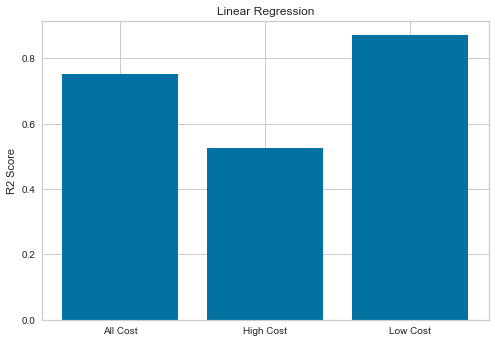

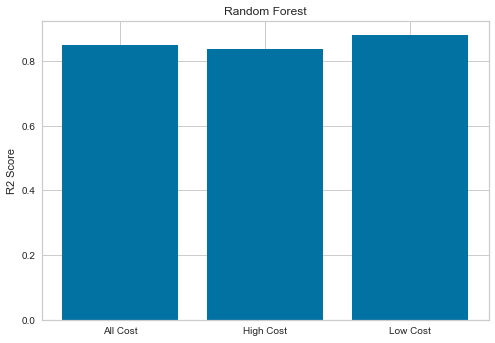

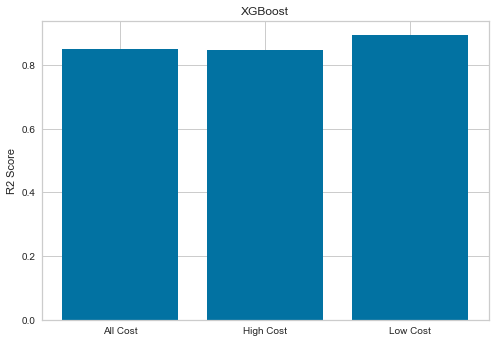

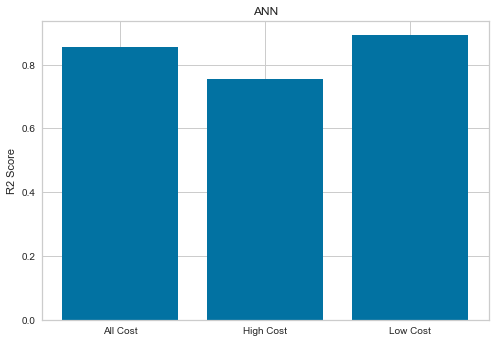

In [30]:
### R2 score plots for each model ###

labels = r2Table.columns.values
models = r2Table.index.values

for i in range(len(models)):
    modelName = r2Table.iloc[i].name
    r2Scores = r2Table.iloc[i].values
    
    plt.title(modelName)
    plt.bar(labels, r2Scores)
    plt.ylabel("R2 Score")
    plt.show()

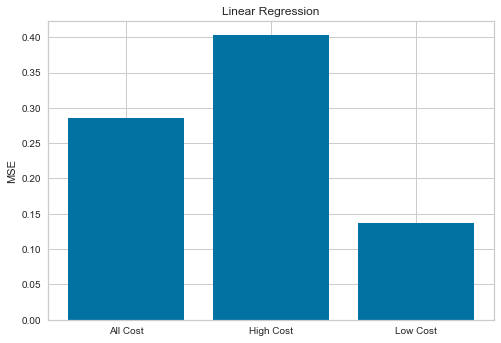

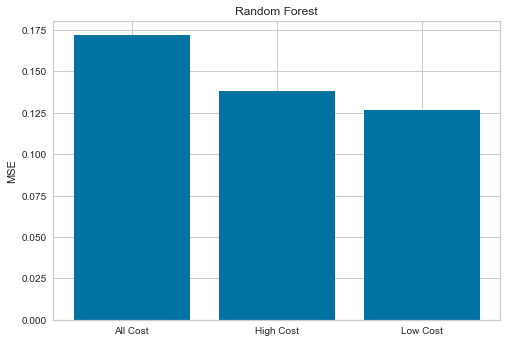

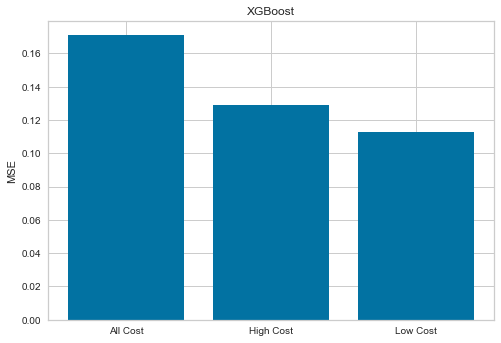

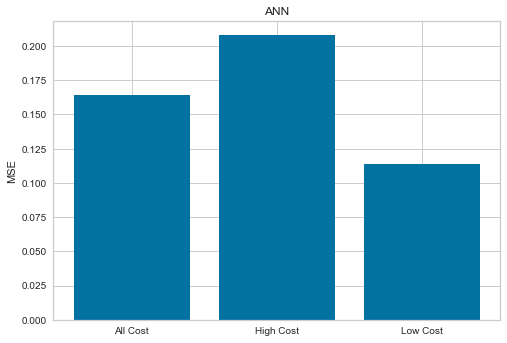

In [31]:
### MSE plots for each model ###

labels = mseTable.columns.values
models = mseTable.index.values

for i in range(len(models)):
    modelName = mseTable.iloc[i].name
    mseValues = mseTable.iloc[i].values
    
    plt.title(modelName)
    plt.bar(labels, mseValues)
    plt.ylabel("MSE")
    plt.show()

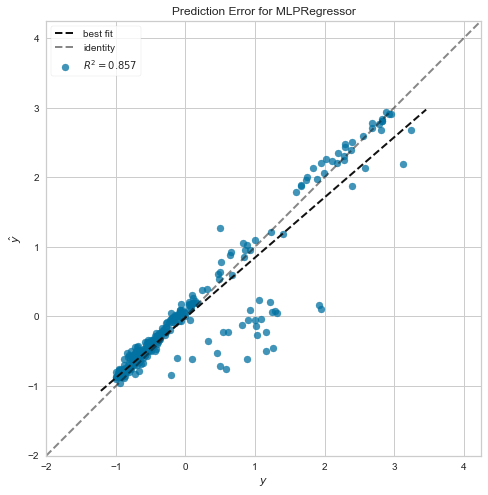

In [9]:
### Plot actual vs predicted for best combined cost model ###

trainInsurance = pd.read_csv("../../data/sets/insurance_train.csv")
testInsurance = pd.read_csv("../../data/sets/insurance_test.csv")

trainX = trainInsurance.drop(columns = ["charges"])
trainY = trainInsurance["charges"]

testX = testInsurance.drop(columns = ["charges"])
testY = testInsurance["charges"]

model = MLPRegressor(
    max_iter = 500,
    hidden_layer_sizes = (4,),
    activation = "relu",
    solver = "lbfgs",
    alpha = 0.0009,
    random_state = 0
)

plt.figure(figsize = (8,8))
visualizer = PredictionError(model)
visualizer.fit(trainX, trainY)
visualizer.score(testX, testY)
visualizer.show()

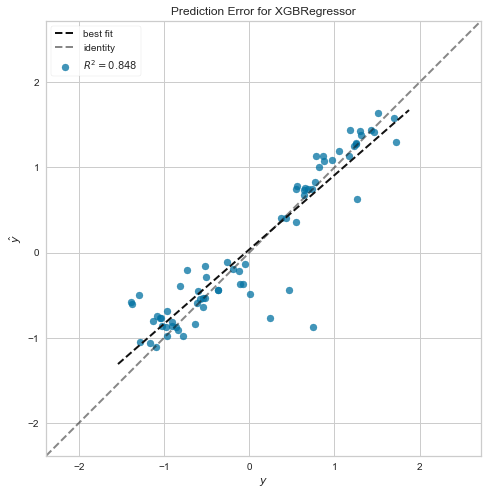

In [11]:
### Plot actual vs predicted for best high cost model ###

highTrain = pd.read_csv("../../data/sets/insurance_high_train.csv")
highTest = pd.read_csv("../../data/sets/insurance_high_test.csv")

highTrainX = highTrain.drop(columns = ["charges"])
highTrainY = highTrain["charges"]

highTestX = highTest.drop(columns = ["charges"])
highTestY = highTest["charges"]

model = XGBRegressor(
    objective = "reg:squarederror",
    n_estimators = 166,
    max_depth = 3,
    colsample_bytree = 0.9,
    subsample = 1,
    learning_rate = 0.06,
    gamma = 0.1,
    random_state = 0
)

plt.figure(figsize = (8,8))
visualizer = PredictionError(model)
visualizer.fit(highTrainX, highTrainY)
visualizer.score(highTestX, highTestY)
visualizer.show()

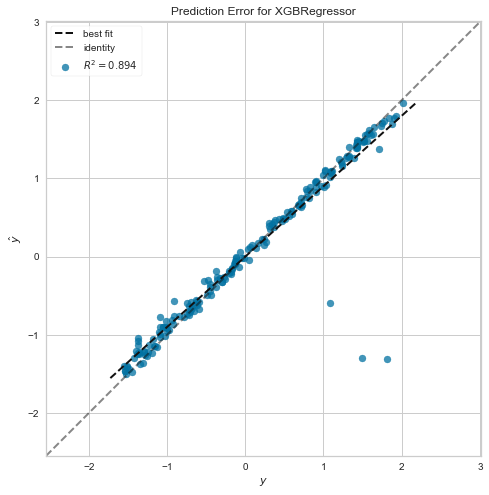

In [12]:
### Plot actual vs predicted for best low cost model ###

lowTrain = pd.read_csv("../../data/sets/insurance_low_train.csv")
lowTest = pd.read_csv("../../data/sets/insurance_low_test.csv")

lowTrainX = lowTrain.drop(columns = ["charges"])
lowTrainY = lowTrain["charges"]

lowTestX = lowTest.drop(columns = ["charges"])
lowTestY = lowTest["charges"]
                        
model = XGBRegressor(
    objective = "reg:squarederror",
    n_estimators = 195,
    max_depth = 2,
    colsample_bytree = 0.6,
    subsample = 1,
    learning_rate = 0.07,
    gamma = 0.01,
    random_state = 0
)

plt.figure(figsize = (8,8))
visualizer = PredictionError(model)
visualizer.fit(lowTrainX, lowTrainY)
visualizer.score(lowTestX, lowTestY)
visualizer.show()